In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
## Constants
numb_of_trials = 10_000
eps = 0.1
bandit_probabilities = [0.2, 0.5, 0.75]

In [6]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.N = 0
        self.estimated_p = 0

    def pull(self):
        if np.random.random() < self.p:
            return 1
        else:
            return 0

    def update(self, result_of_pull):
        sum = self.estimated_p * self.N + result_of_pull
        self.N += 1
        self.estimated_p = sum / self.N
        

In [20]:
def experiment():
    bandits = [Bandit(p) for p in bandit_probabilities]

    numb_of_exploits = 0
    numb_of_explores = 0
    rewards = np.zeros(numb_of_trials)
    num_optimal = 0
    optimal_j = np.argmax([bandit.p for bandit in bandits])

    print("Optimal j:", optimal_j)

    for i in range (numb_of_trials):
        
        if np.random.random() < eps:
            numb_of_explores += 1
            chosen_bandit_index = np.random.randint(low=0, high=3)
        else:
            numb_of_exploits += 1
            chosen_bandit_index = np.argmax([bandit.estimated_p for bandit in bandits])
        
        if chosen_bandit_index == optimal_j:
            num_optimal += 1

        chosen_bandit = bandits[chosen_bandit_index]

        result_of_pull = chosen_bandit.pull()
        rewards[i] = result_of_pull
        chosen_bandit.update(result_of_pull)

    ## Stats
    print("Optimal Runs:", num_optimal)
    print("Bandits' P Estimates:", [bandit.estimated_p for bandit in bandits])
    print("Percentage of Exploit: ", (numb_of_exploits / (numb_of_exploits+numb_of_explores)))
    print("Reward Percentage: ", rewards.sum() / numb_of_trials)

    ## Plots
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(numb_of_trials) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(numb_of_trials)*np.max(bandit_probabilities))
    plt.show()

Optimal j: 2
Optimal Runs: 9203
Bandits' P Estimates: [0.2238372093023256, 0.49448123620309015, 0.7455177659458851]
Percentage of Exploit:  0.8948
Reward Percentage:  0.7162


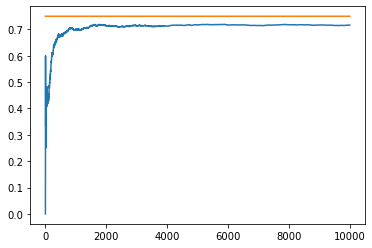

In [21]:
experiment()